---
# 💼 Attrition in an Organization || Why Workers Quit?


## 📌 Business questions to brainstorm:
---
> 1. What factors are contributing more to employee attrition?
> 1. What type of measures should the company take in order to retain their employees?
> 1. What business value does the model bring?
> 1. Will the model save lots of money?
> 1. Which business unit faces the attrition problem?

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [ ]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape

(1470, 35)

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# DF Quality 6
1. null
2. duplicated
3. valid (range,format)

know numerical columns <=10 and its values

In [ ]:
#3 is data valid (range,format(dtype))
for column in df.columns:
  if df[column].dtypes !='object' and df[column].nunique() <=10:
    # if df[column].dtype==object
    print("{}:{}".format(column,df[column].unique()))
    print('='*40)

Education:[2 1 4 3 5]
EmployeeCount:[1]
EnvironmentSatisfaction:[2 3 4 1]
JobInvolvement:[3 2 4 1]
JobLevel:[2 1 3 4 5]
JobSatisfaction:[4 2 3 1]
NumCompaniesWorked:[8 1 6 9 0 4 5 2 7 3]
PerformanceRating:[3 4]
RelationshipSatisfaction:[1 4 2 3]
StandardHours:[80]
StockOptionLevel:[0 1 3 2]
TrainingTimesLastYear:[0 3 2 5 1 4 6]
WorkLifeBalance:[1 3 2 4]


*know numerical columns >10 and its values*

In [ ]:
for column in df.columns:
  if df[column].dtypes !='object' and df[column].nunique() > 10:
    print("{}: min :{}, max: {}".format(column ,df[column].min(),df[column].max()))
    print("="*40)



Age: min :18, max: 60
DailyRate: min :102, max: 1499
DistanceFromHome: min :1, max: 29
EmployeeNumber: min :1, max: 2068
HourlyRate: min :30, max: 100
MonthlyIncome: min :1009, max: 19999
MonthlyRate: min :2094, max: 26999
PercentSalaryHike: min :11, max: 25
TotalWorkingYears: min :0, max: 40
YearsAtCompany: min :0, max: 40
YearsInCurrentRole: min :0, max: 18
YearsSinceLastPromotion: min :0, max: 15
YearsWithCurrManager: min :0, max: 17


In [ ]:
# min max
for column in df.select_dtypes('number'):
  print("{}:{}:{}".format(column,df[column].max(),df[column].min()))



Age:60:18
DailyRate:1499:102
DistanceFromHome:29:1
Education:5:1
EmployeeCount:1:1
EmployeeNumber:2068:1
EnvironmentSatisfaction:4:1
HourlyRate:100:30
JobInvolvement:4:1
JobLevel:5:1
JobSatisfaction:4:1
MonthlyIncome:19999:1009
MonthlyRate:26999:2094
NumCompaniesWorked:9:0
PercentSalaryHike:25:11
PerformanceRating:4:3
RelationshipSatisfaction:4:1
StandardHours:80:80
StockOptionLevel:3:0
TotalWorkingYears:40:0
TrainingTimesLastYear:6:0
WorkLifeBalance:4:1
YearsAtCompany:40:0
YearsInCurrentRole:18:0
YearsSinceLastPromotion:15:0
YearsWithCurrManager:17:0


know categorical columns unique values and there count

In [ ]:
#3 is data valid (range,format(dtype))
for column in df.columns:
  if df[column].dtypes =='object' and df[column].nunique() <=10:
    print("{}:{}".format(column,df[column].unique()))
    print('='*40)

Attrition:['Yes' 'No']
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department:['Sales' 'Research & Development' 'Human Resources']
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender:['Female' 'Male']
JobRole:['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus:['Single' 'Married' 'Divorced']
Over18:['Y']
OverTime:['Yes' 'No']


**We notice** that 'EmployeeCount', 'Over18', 'StandardHours' have only one unique values and 'EmployeeNumber' has 1470 unique values. This features aren't useful for us, So we are going to drop those columns.

In [ ]:
# no need to use them
df.drop(['Over18','EmployeeCount','EmployeeNumber','StandardHours'],axis=1,inplace=True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
#3 is data valid (range,format(dtype))
# it helps you to see data quality in cleaning data like may be there's
# FEMALE female male and it sees that is three types in gender
for column in df.select_dtypes('object'):
  print("{}:{} ".format(column,df[column].unique()))
  print( df[column].value_counts())
  print("---"*40)

Attrition:['Yes' 'No'] 
Attrition
No     1233
Yes     237
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
BusinessTravel:['Travel_Rarely' 'Travel_Frequently' 'Non-Travel'] 
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
Department:['Sales' 'Research & Development' 'Human Resources'] 
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
------------------------------------------------------------------------------------------------------------------------
EducationField:['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources'] 
EducationField
Life Sciences       606
Medical             464
Marketing 

In [ ]:
df.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EnvironmentSatisfaction,0
Gender,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
numeric_col=list(df.select_dtypes('number'))
categorical_col=list(df.select_dtypes('object'))
print("Numerical column: ", numeric_col)
print("Categorical column: ", categorical_col)

Numerical column:  ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
Categorical column:  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [ ]:
#statistical data
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#statistical data
df[categorical_col].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,No
freq,1233,1043,961,606,882,326,673,1054


is that data balanced
* **noo**

In [ ]:
df['Attrition'].value_counts()
#df['Attrition'].value_counts(normalize=True)*100

,count
Attrition,
No,1233
Yes,237


**Overall, around 16% of employees left the company.**

# Balancing techniques
1. **undersampling**
clear from no till you reach yes count
2. **oversampling**
mimimc generate data like little calss and make it counts= large class
3. **both**
قلل ديه و زود ديه


WHAT is the contribution of each department in the company that has left

In [ ]:
# count number that left totaly
plot_df2=df[df.Attrition=='Yes']
# percent that left in each department
plot_df2['Department'].value_counts(normalize=True)


,proportion
Department,
Research & Development,0.561181
Sales,0.388186
Human Resources,0.050633


▶ **Among former employees, o**ver half worked in Research & Development have left, while only 5% were from Human Resources.

In [ ]:
#which gender leave work mostly
#male
df.groupby('Gender')['Attrition'].value_counts(normalize='True')

Gender  Attrition
Female  No           0.852041
        Yes          0.147959
Male    No           0.829932
        Yes          0.170068
Name: proportion, dtype: float64

▶ arround 17% of male left while 15% of female left

In [ ]:
df.groupby('Department')['Attrition'].value_counts(normalize='True')

Department              Attrition
Human Resources         No           0.809524
                        Yes          0.190476
Research & Development  No           0.861602
                        Yes          0.138398
Sales                   No           0.793722
                        Yes          0.206278
Name: proportion, dtype: float64

▶ sales and HR department leave BY( 20% OF THEIR count)
▶ R&D Leave by 14% of their count that contribute( 50% of total employees that leave the company)

In [ ]:
df.groupby(['Gender', 'Department'])['Department'].value_counts()

Gender  Department            
Female  Human Resources            20
        Research & Development    379
        Sales                     189
Male    Human Resources            43
        Research & Development    582
        Sales                     257
Name: count, dtype: int64

In [ ]:
df.groupby(['Gender', 'Department'])['Attrition'].value_counts(normalize=True)*100

Gender  Department              Attrition
Female  Human Resources         No           70.000000
                                Yes          30.000000
        Research & Development  No           88.654354
                                Yes          11.345646
        Sales                   No           79.894180
                                Yes          20.105820
Male    Human Resources         No           86.046512
                                Yes          13.953488
        Research & Development  No           84.536082
                                Yes          15.463918
        Sales                   No           78.988327
                                Yes          21.011673
Name: proportion, dtype: float64

▶ Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company.
▶ For men, the highest proportion of turnover occurred in the Sales department 21%  that's the same percent of female in sales department also 20%.

In [ ]:
df.groupby(['WorkLifeBalance','Gender'])['Attrition'].value_counts(normalize=True)*100

WorkLifeBalance  Gender  Attrition
1                Female  No           76.666667
                         Yes          23.333333
                 Male    No           64.000000
                         Yes          36.000000
2                Female  No           86.029412
                         Yes          13.970588
                 Male    No           81.250000
                         Yes          18.750000
3                Female  No           87.123288
                         Yes          12.876712
                 Male    No           84.848485
                         Yes          15.151515
4                Female  No           75.438596
                         Yes          24.561404
                 Male    No           86.458333
                         Yes          13.541667
Name: proportion, dtype: float64

▶ Among women with the highest rated work life balance, 4 out of 4 and 1 out of 4 left the company, the highest proportion among the ratings for women.
▶  For men, the highest proportion occurred in those with the lowest work life balance 1 out of 4.

In [ ]:
df.groupby(['EnvironmentSatisfaction'])['Attrition'].value_counts(normalize=True)*100

EnvironmentSatisfaction  Attrition
1                        No           74.647887
                         Yes          25.352113
2                        No           85.017422
                         Yes          14.982578
3                        No           86.313466
                         Yes          13.686534
4                        No           86.547085
                         Yes          13.452915
Name: proportion, dtype: float64

▶ most people that has 1 out of 4 EnvironmentSatisfaction rate has left
1 person from each 4 like 25%

In [ ]:
df.groupby(['MaritalStatus'])['Attrition'].value_counts(normalize=True)*100

MaritalStatus  Attrition
Divorced       No           89.908257
               Yes          10.091743
Married        No           87.518574
               Yes          12.481426
Single         No           74.468085
               Yes          25.531915
Name: proportion, dtype: float64

▶ Single employee leave mostly 1 out of 4 will leave the job
25,5%

<Axes: xlabel='count', ylabel='MaritalStatus'>

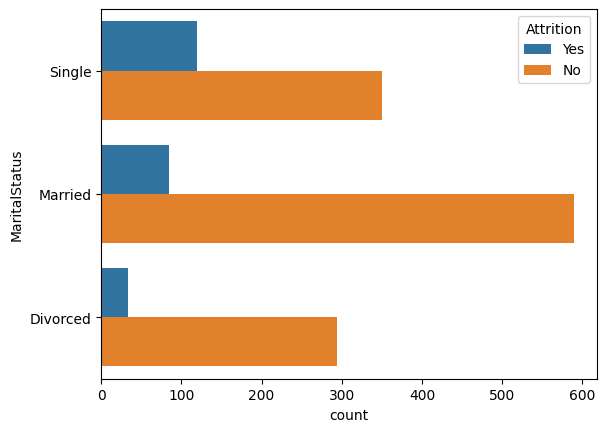

In [ ]:
sns.countplot(y='MaritalStatus', hue='Attrition', data=df)

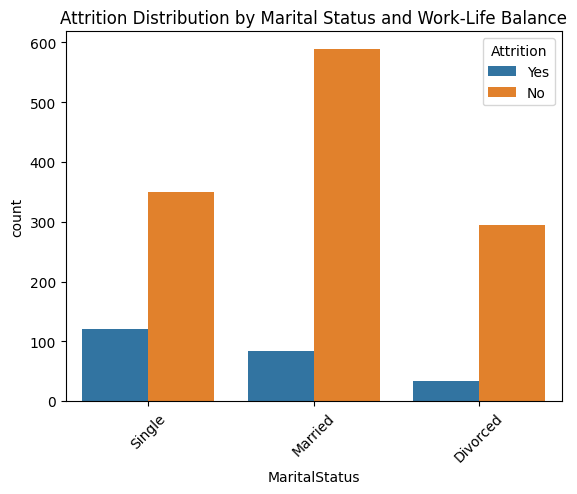

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


# Use a count plot to show the distribution of Attrition across MaritalStatus and WorkLifeBalance
sns.countplot(x='MaritalStatus', hue='Attrition', data=df)

# Add title and labels
plt.title('Attrition Distribution by Marital Status and Work-Life Balance')


# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Attrition')



In [ ]:
df.groupby(['MaritalStatus','WorkLifeBalance'])['Attrition'].value_counts(normalize=True)*100

MaritalStatus  WorkLifeBalance  Attrition
Divorced       1                No           69.230769
                                Yes          30.769231
               2                No           87.500000
                                Yes          12.500000
               3                No           91.237113
                                Yes           8.762887
               4                No           96.875000
                                Yes           3.125000
Married        1                No           78.571429
                                Yes          21.428571
               2                No           88.235294
                                Yes          11.764706
               3                No           89.135802
                                Yes          10.864198
               4                No           82.191781
                                Yes          17.808219
Single         1                No           52.000000
                                Yes          48.000000
               2                No           71.844660
                                Yes          28.155340
               3                No           77.551020
                                Yes          22.448980
               4                No           72.916667
                                Yes          27.083333
Name: proportion, dtype: float64

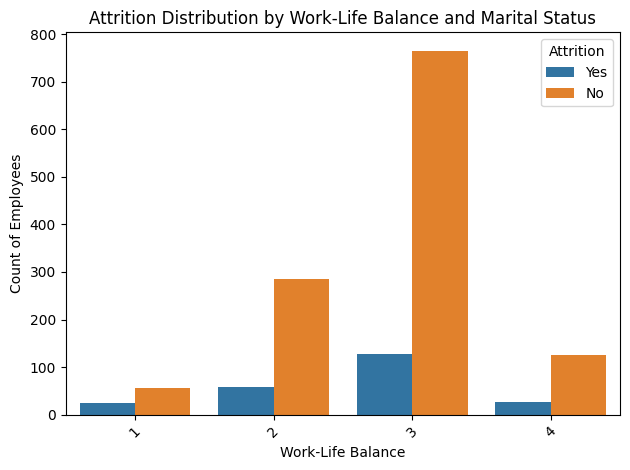

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the count plot

# Use a count plot to show the distribution of Attrition across MaritalStatus and WorkLifeBalance
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, order=[1, 2, 3, 4])
# Add title and labels
plt.title('Attrition Distribution by Work-Life Balance and Marital Status')
plt.xlabel('Work-Life Balance')
plt.ylabel('Count of Employees')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add legend
plt.legend(title='Attrition')

# Show the plot
plt.tight_layout()
plt.show()


* **Single** and has 1 out of 4 worklifebalance half of them 48%of them leave ⏬
and had 2 out of 4 nearly 28% of them leave and in 3 and 4 has high tendenct to leave
* **Divorced** and has 1 out of 4 worklifebalance 30%of them leave
* **Married** and has 1 out of 4 worklifebalance 21,4%of them leave
and has 14 out of 4 worklifebalance 17.8%of them leave

In [ ]:
df.groupby(['TrainingTimesLastYear'])['Attrition'].value_counts(normalize=True)*100

TrainingTimesLastYear  Attrition
0                      No           72.222222
                       Yes          27.777778
1                      No           87.323944
                       Yes          12.676056
2                      No           82.084095
                       Yes          17.915905
3                      No           85.947047
                       Yes          14.052953
4                      No           78.861789
                       Yes          21.138211
5                      No           88.235294
                       Yes          11.764706
6                      No           90.769231
                       Yes           9.230769
Name: proportion, dtype: float64

<Axes: xlabel='TrainingTimesLastYear', ylabel='count'>

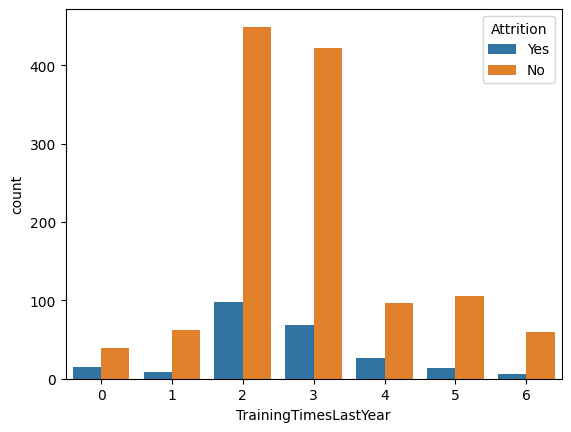

In [ ]:
sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df)

▶

In [ ]:
df.groupby(['JobRole', 'Gender'])['MonthlyIncome'].mean()

JobRole                    Gender
Healthcare Representative  Female     7433.803922
                           Male       7589.300000
Human Resources            Female     4540.687500
                           Male       4100.222222
Laboratory Technician      Female     3246.905882
                           Male       3232.413793
Manager                    Female    16915.276596
                           Male      17409.327273
Manufacturing Director     Female     7409.166667
                           Male       7182.671233
Research Director          Female    15144.484848
                           Male      16657.787234
Research Scientist         Female     3344.473684
                           Male       3173.044944
Sales Executive            Female     6764.310606
                           Male       7033.123711
Sales Representative       Female     2671.947368
                           Male       2587.200000
Name: MonthlyIncome, dtype: float64

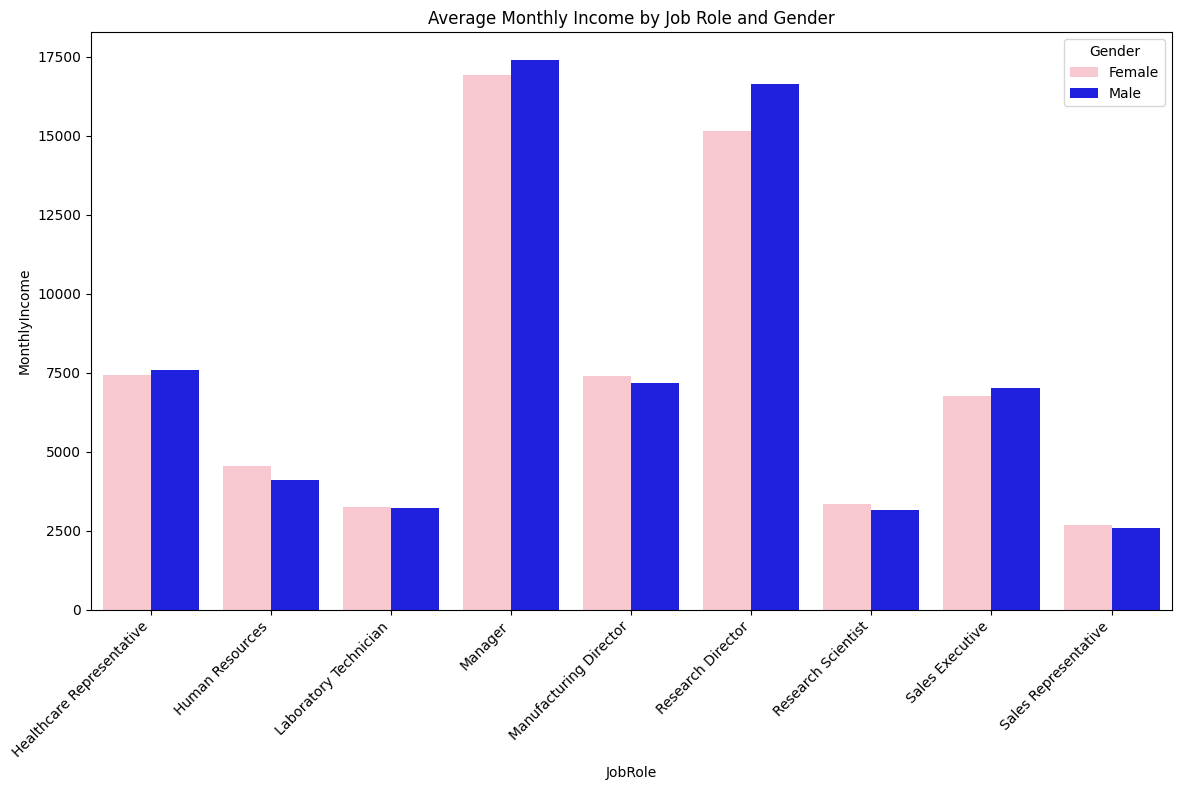

In [ ]:
# Calculate the mean MonthlyIncome for each combination of JobRole and Gender
income_by_role_gender = df.groupby(['JobRole', 'Gender'])['MonthlyIncome'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 8))  # Increase figure size if labels are not appearing

# Define a custom color palette
custom_palette = {'Female': 'pink', 'Male': 'blue'}

sns.barplot(x='JobRole', y='MonthlyIncome', hue='Gender', data=income_by_role_gender, palette=custom_palette)

# Add title and labels
plt.title('Average Monthly Income by Job Role and Gender')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.legend(title='Gender')  # Add legend title for clarity
plt.tight_layout()  # Adjust layout to ensure labels fit well

# Show the plot
plt.show()


▶ it seems that men and female take nearly same amount of money

In [ ]:
df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False)


,MonthlyIncome
JobRole,
Manager,17181.676471
Research Director,16033.550000
Healthcare Representative,7528.763359
Manufacturing Director,7295.137931
Sales Executive,6924.279141
Human Resources,4235.750000
Research Scientist,3239.972603
Laboratory Technician,3237.169884
Sales Representative,2626.000000


<ipython-input-36-c8ad724eb49e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MonthlyIncome',


Text(0.5, 1.0, 'Average Monthly Income by Job Role ')

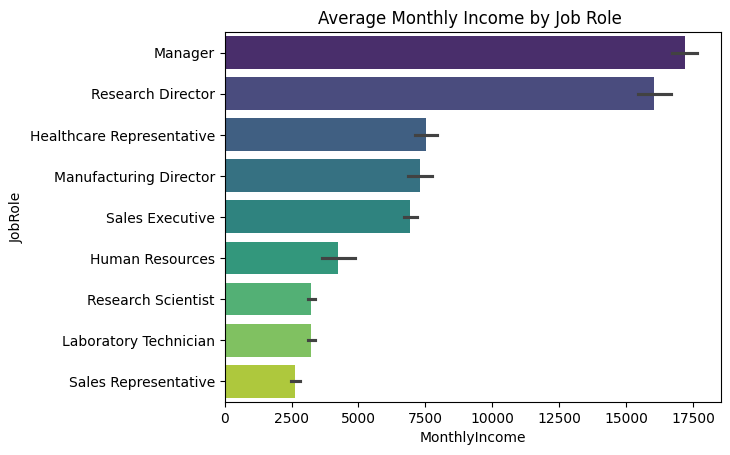

In [ ]:

#sns.barplot(x='MonthlyIncome', y='JobRole', data=df, palette='viridis')

# Create the bar plot with automatic calculation of the mean and sort in descending order
sns.barplot(x='MonthlyIncome',
            y='JobRole',
            data=df,
            palette='viridis',
            order=df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False).index)

# Add title and labels
plt.title('Average Monthly Income by Job Role ')


* ▶ highest monthlyincome are managers and Research Director
* ▶ lowest monthlyincome are Sales Representative

In [ ]:
#rename value_Counts
df['JobLevel']=pd.Categorical(df['JobLevel']).rename_categories(  ['Entry level', 'Mid level', 'Senior', 'Lead', 'Executive'])

In [ ]:
df['JobLevel']

,JobLevel
0,Mid level
1,Mid level
2,Entry level
3,Entry level
4,Entry level
...,...
1465,Mid level
1466,Senior
1467,Mid level
1468,Mid level


In [ ]:
categorical_col

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [ ]:
x=[]
for col in df.columns:
  if df[col].dtypes !='object' and df[col].nunique() <= 10:
    x.append(col)
x

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'NumCompaniesWorked',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TrainingTimesLastYear',
 'WorkLifeBalance']

# visualization

<Axes: xlabel='Attrition', ylabel='count'>

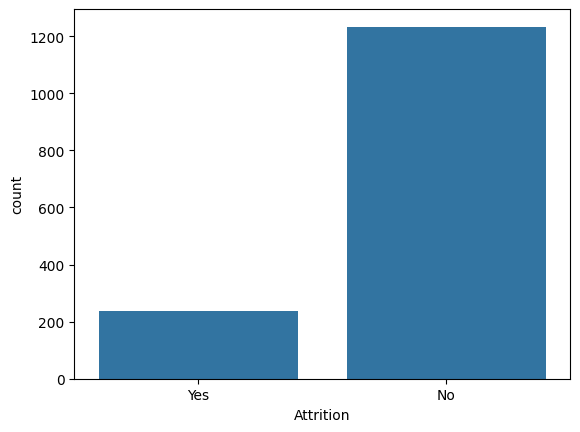

In [ ]:
# is thata data balanced
sns.countplot(x=df['Attrition'])

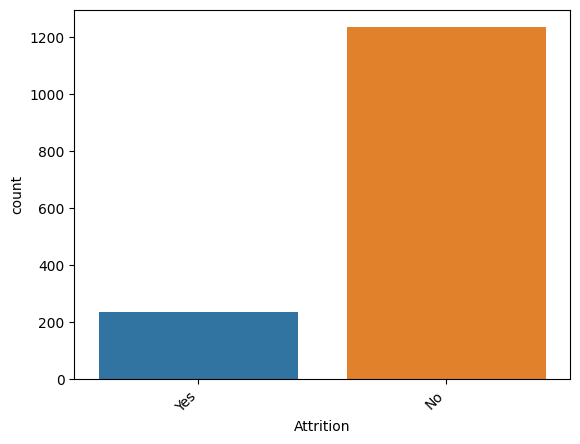

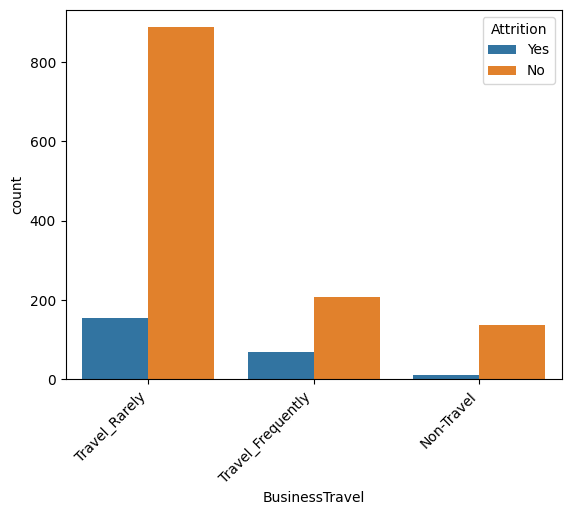

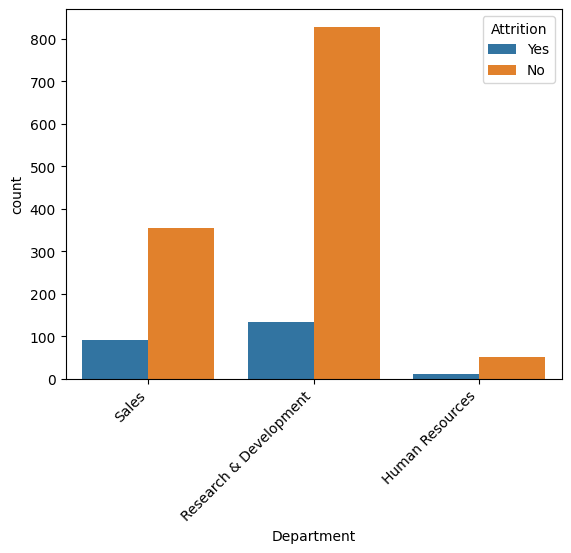

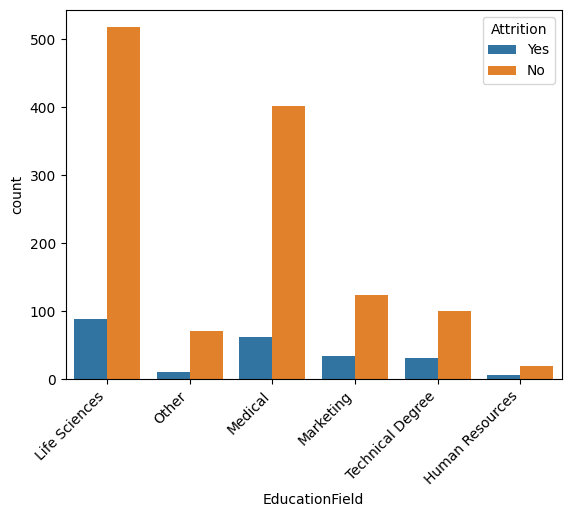

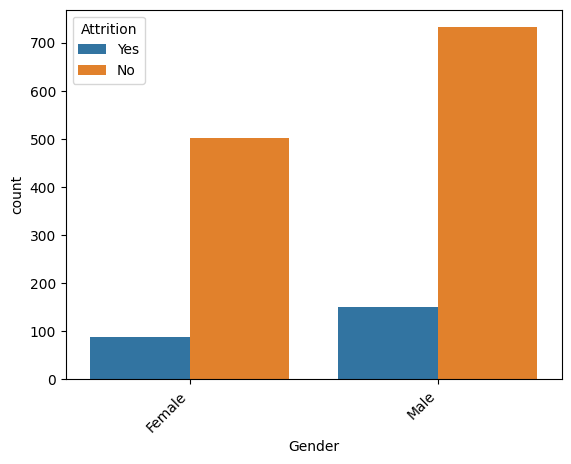

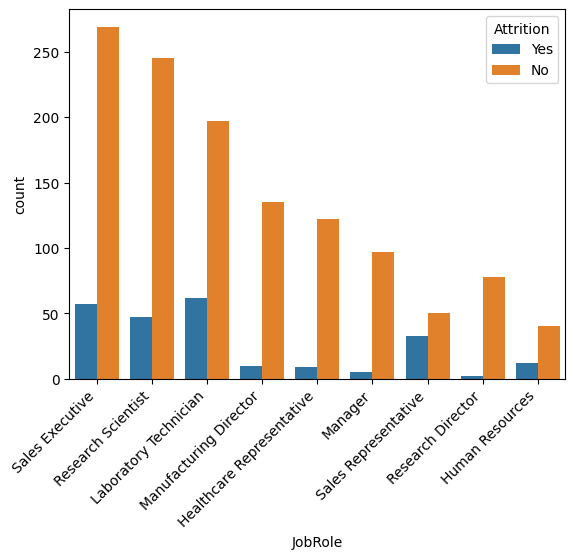

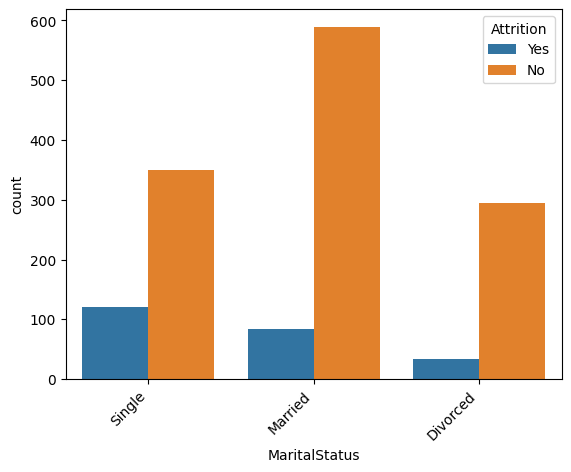

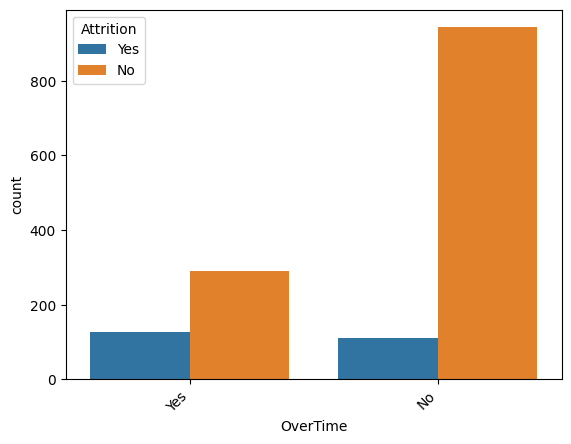

In [ ]:
# count of each sample
for col in df.select_dtypes('object'):
  sns.countplot(data=df,x=col,hue='Attrition')
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

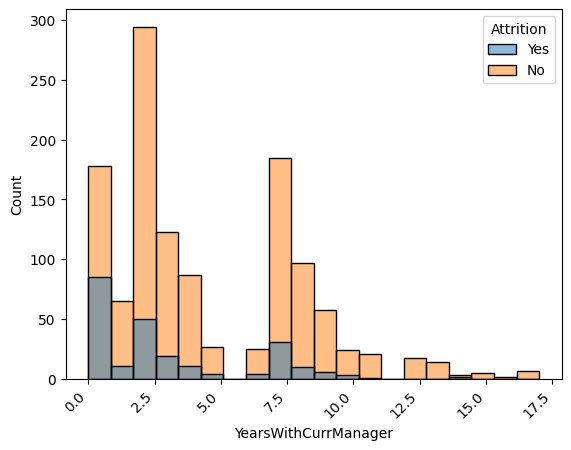

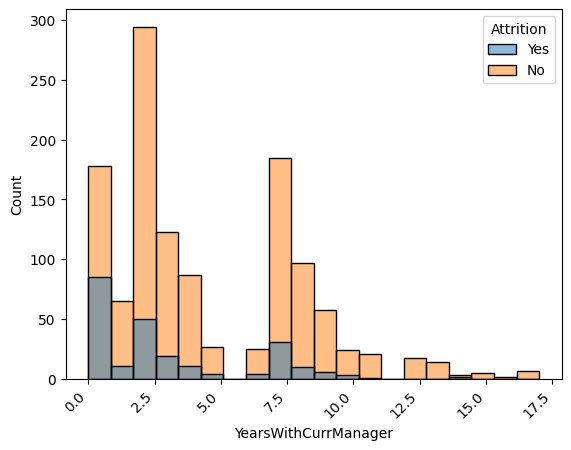

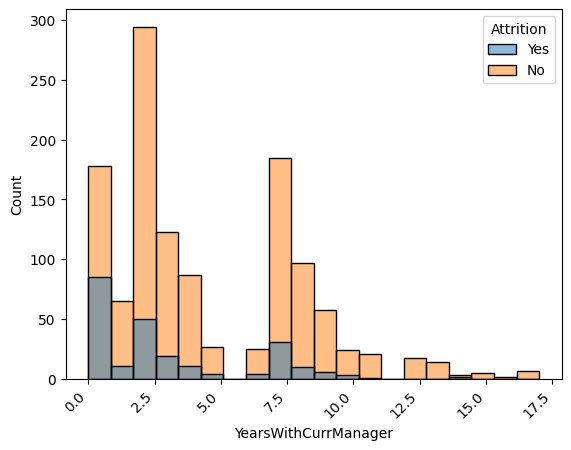

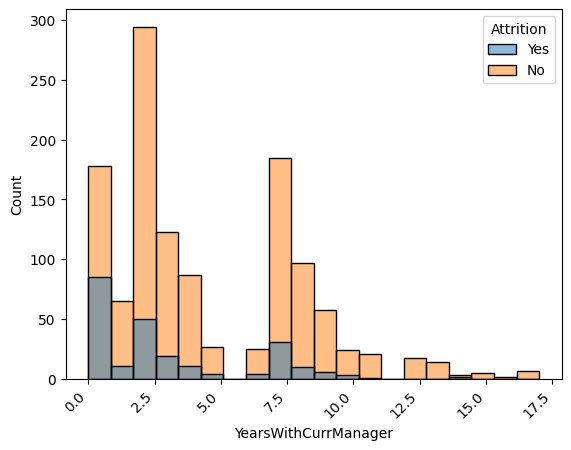

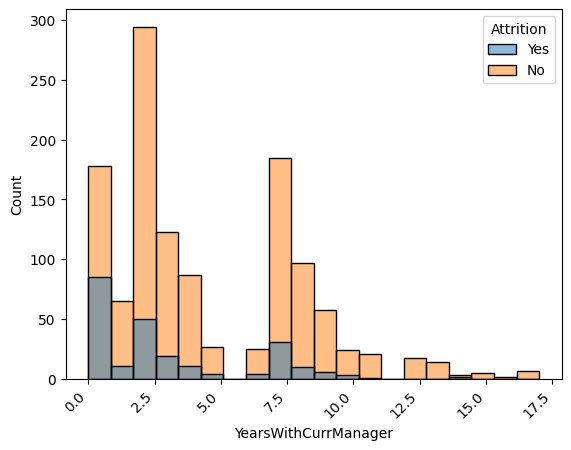

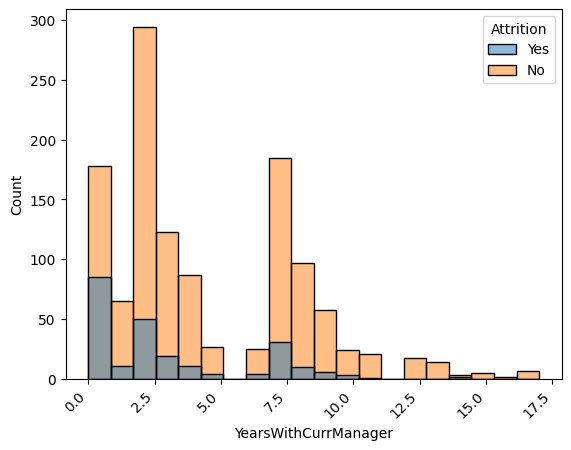

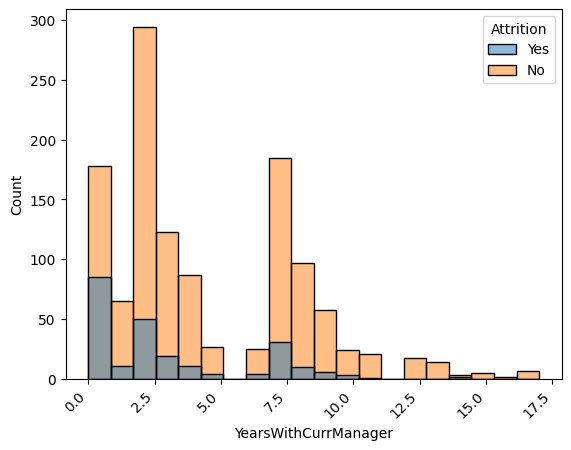

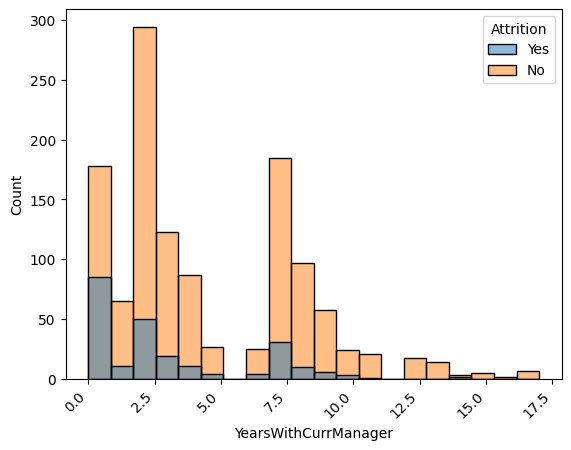

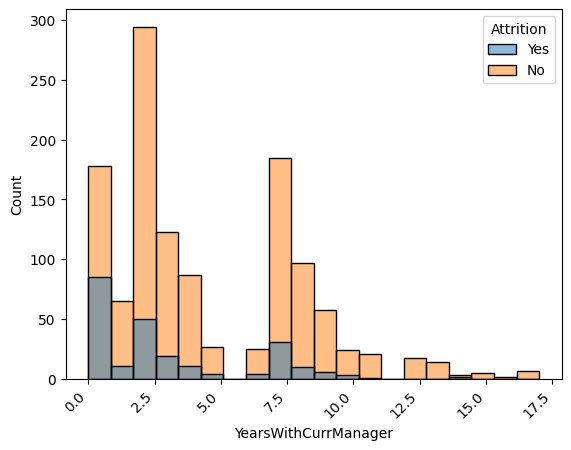

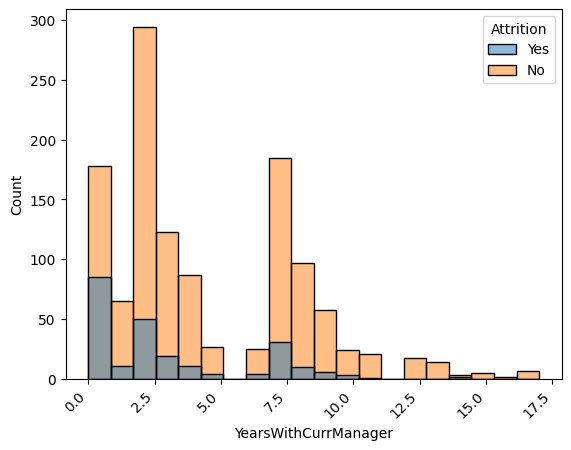

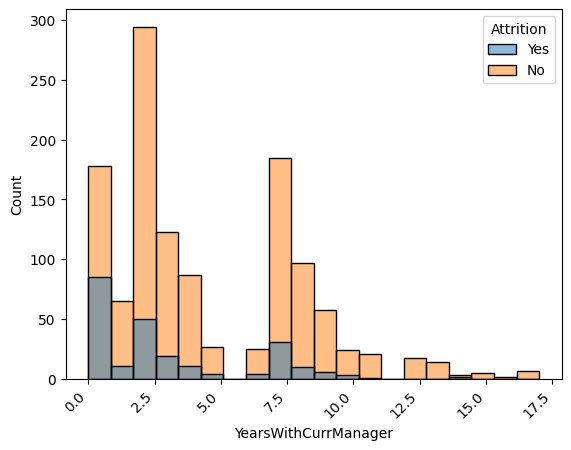

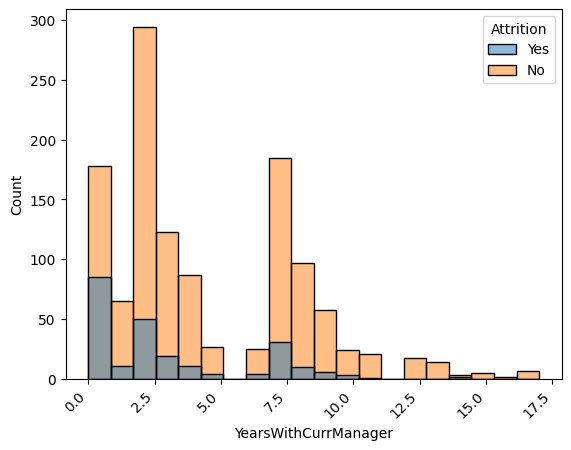

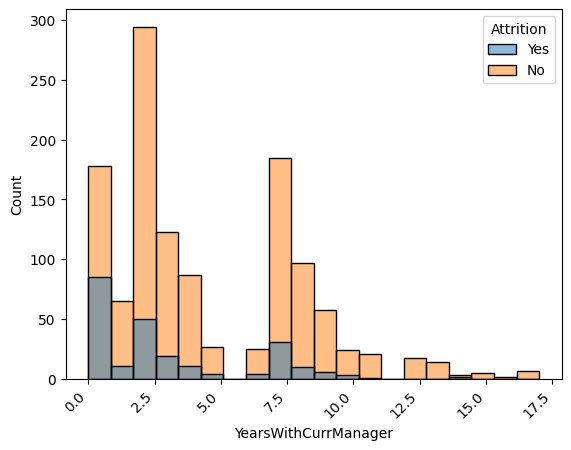

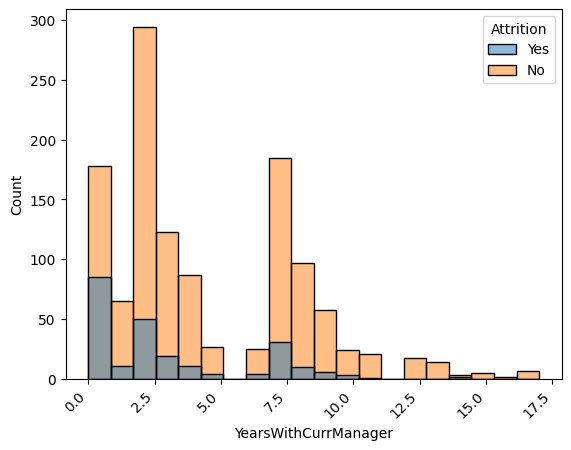

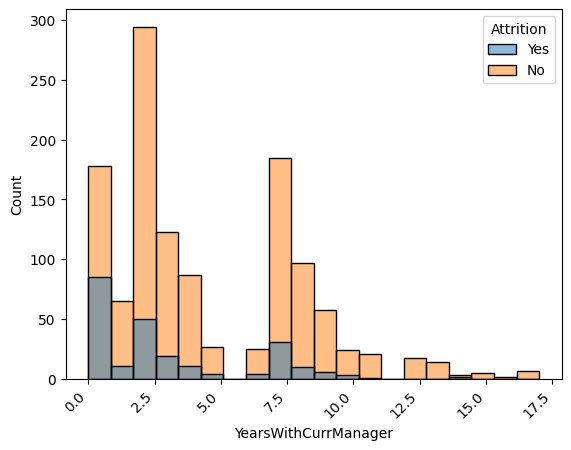

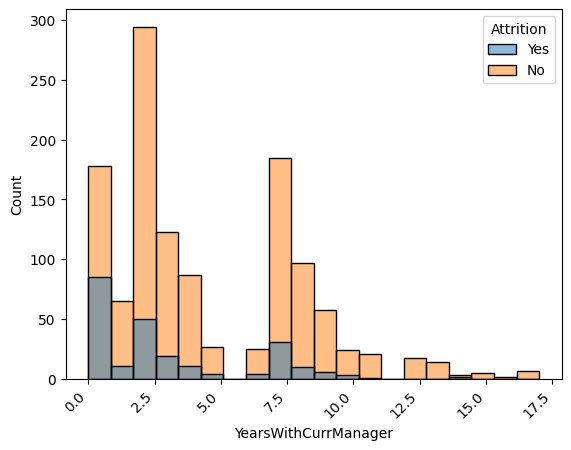

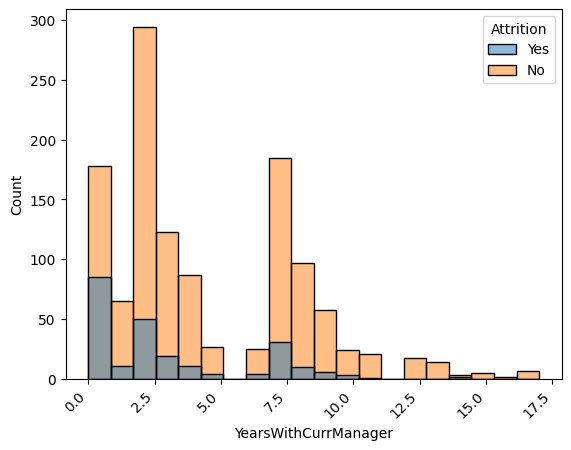

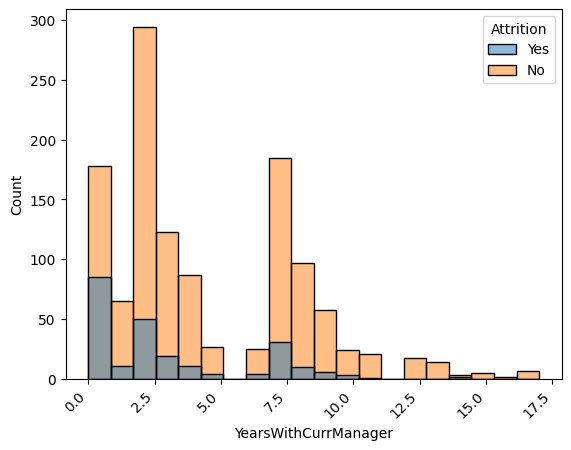

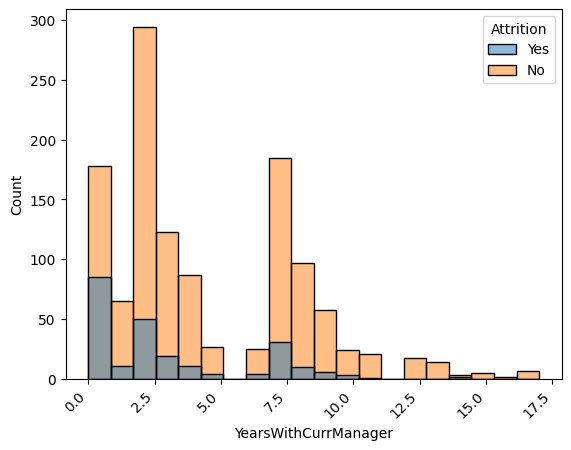

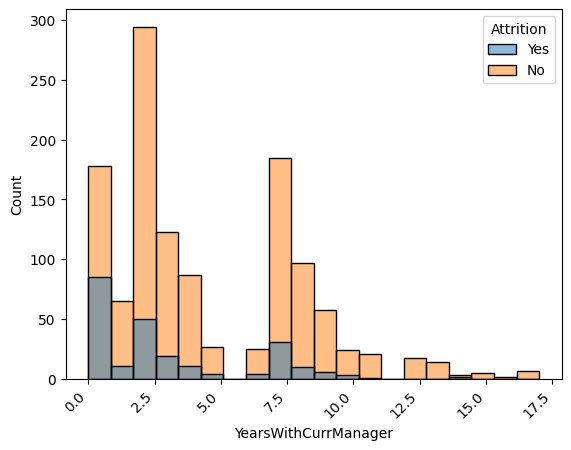

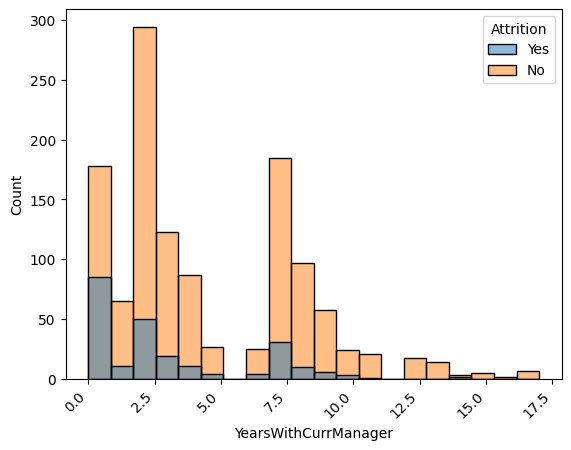

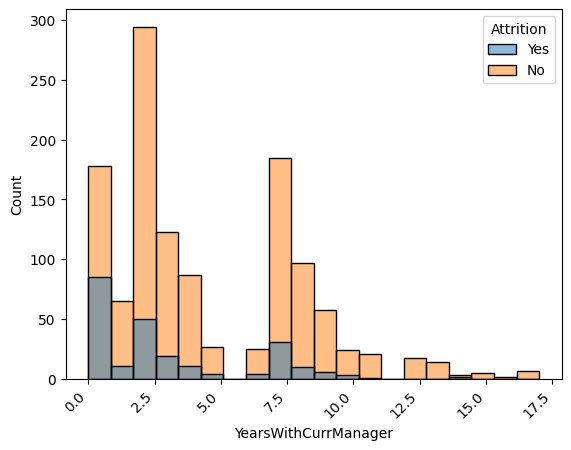

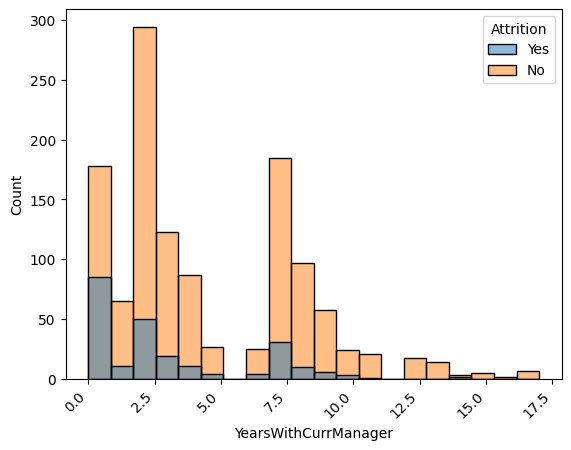

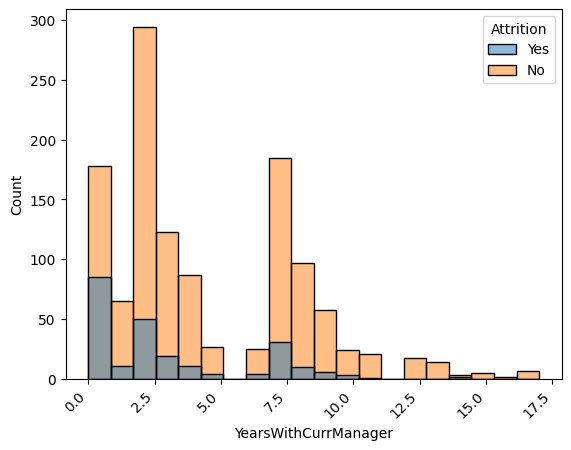

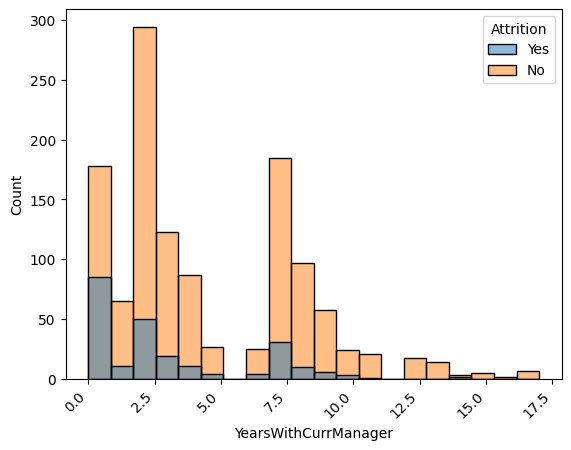

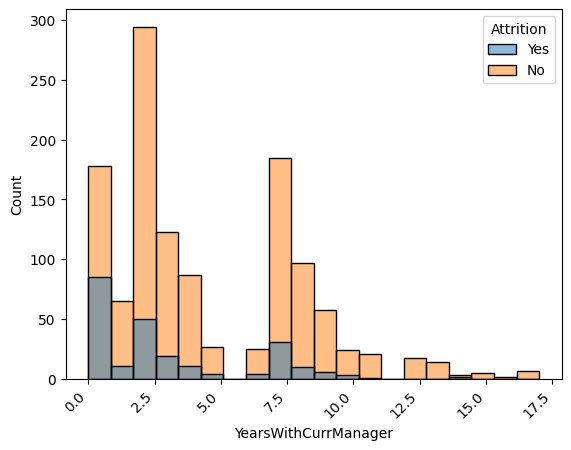

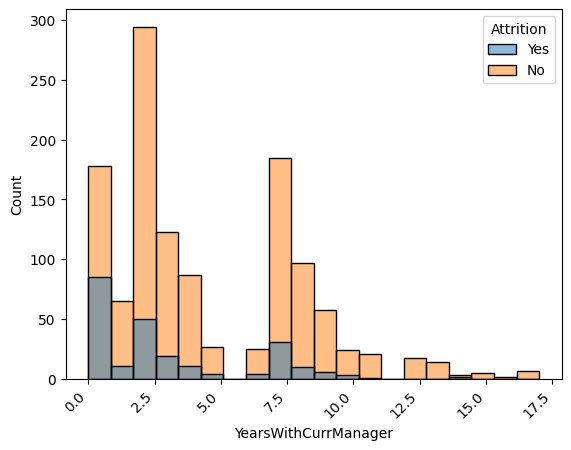

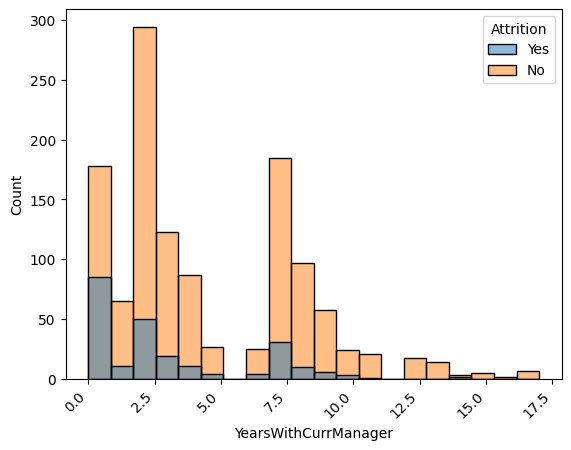

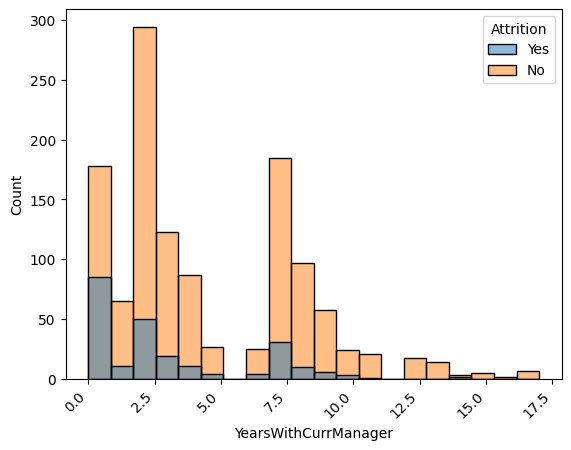

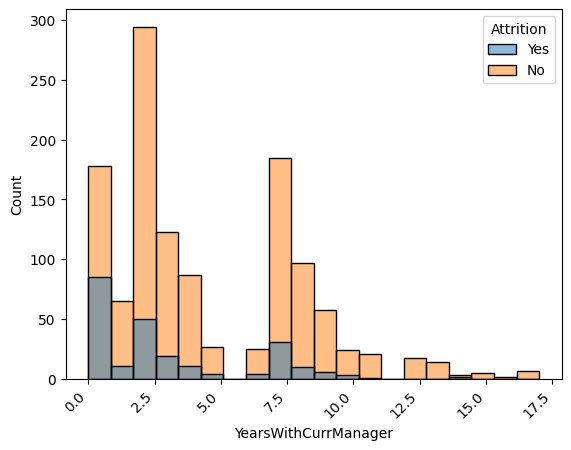

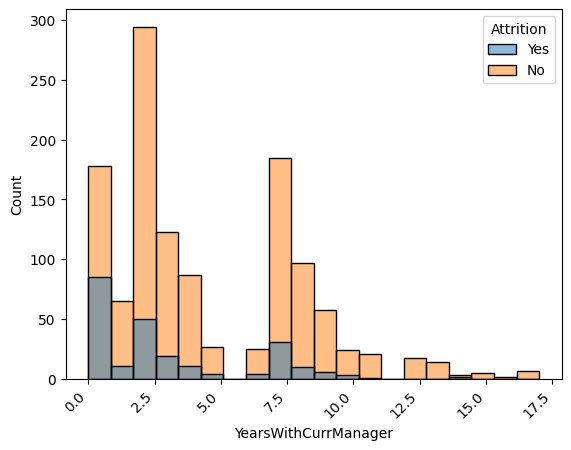

In [ ]:
#2 histplot of each sample
for col in df.columns:
  sns.histplot(data=df,x='YearsWithCurrManager',hue='Attrition')
  plt.xticks(rotation=45, ha='right')
  plt.show()

## 📌 Note

It seems that `EnvironmentSatisfaction`, `JobSatisfaction`, `PerformanceRating`, and `RelationshipSatisfaction` features don't have big impact on the detrmination of `Attrition` of employees.

***

## 📝 **Conclusions:**

***
- The workers with low `JobLevel`, `MonthlyIncome`, `YearAtCompany`, and `TotalWorkingYears` are more likely to quit there jobs.
- `BusinessTravel` : The workers who travel alot are more likely to quit then other employees.

- `Department` : The worker in `Research & Development` are more likely to stay then the workers on other departement.

- `EducationField` : The workers with `Human Resources` and `Technical Degree` are more likely to quit then employees from other fields of educations.

- `Gender` : The `Male` are more likely to quit.

- `JobRole` : The workers in `Laboratory Technician`, `Sales Representative`, and `Human Resources` are more likely to quit the workers in other positions.

- `MaritalStatus` : The workers who have `Single` marital status are more likely to quit the `Married`, and `Divorced`.

- `OverTime` : The workers who work more hours are likely to quit then others.

***

In [ ]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

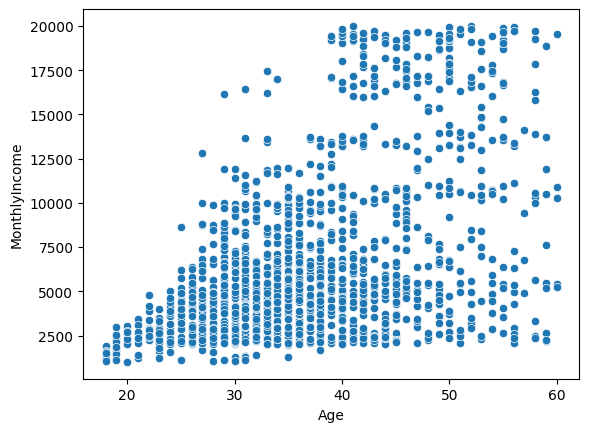

In [ ]:
sns.scatterplot(data=df,x='Age', y='MonthlyIncome')

Binning salaries to see some insights

In [ ]:
df['MonthlyIncome'].min(),df['MonthlyIncome'].mean(),df['MonthlyIncome'].max()


(1009, 6502.931292517007, 19999)

In [ ]:
#df['MonthlyIncome_Binned'] = pd.cut(df['MonthlyIncome'], bins=bins)

In [ ]:
# numeri corr
df['Attrition_numeric'] = df['Attrition'].map({'Yes': 1, 'No': 0})

numeric_cols = df.select_dtypes(include=['number'])

# Calculating correlation of each numerical column with the 'Attrition' column
correlations = numeric_cols.corrwith(df['Attrition_numeric'])

print(correlations)

Age                        -0.159205
DailyRate                  -0.056652
DistanceFromHome            0.077924
Education                  -0.031373
EnvironmentSatisfaction    -0.103369
HourlyRate                 -0.006846
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
MonthlyIncome              -0.159840
MonthlyRate                 0.015170
NumCompaniesWorked          0.043494
PercentSalaryHike          -0.013478
PerformanceRating           0.002889
RelationshipSatisfaction   -0.045872
StockOptionLevel           -0.137145
TotalWorkingYears          -0.171063
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
YearsAtCompany             -0.134392
YearsInCurrentRole         -0.160545
YearsSinceLastPromotion    -0.033019
YearsWithCurrManager       -0.156199
Attrition_numeric           1.000000
dtype: float64


# Dashboard

In [ ]:
pip install dash pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 57.5 MB/s eta 0:00:00


In [ ]:
pip install plotly.express

In [ ]:
pip install dash_bootstrap_components

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 5.9 MB/s eta 0:00:00


In [ ]:
from dash import Dash, html, dcc, callback, Output, Input
import pandas as pd
import plotly.graph_objects as go
import dash_bootstrap_components as dbc
import dash_table
import plotly.express as px

# Load the data

# Initialize the Dash app
external_stylesheets = [dbc.themes.CERULEAN]
app = Dash(__name__, external_stylesheets=external_stylesheets)

# List of features
features = [
    'Attrition', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'MonthlyIncome', 'JobRole', 'NumCompaniesWorked', 'YearsAtCompany',
    'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
]

other_features = ['MaritalStatus', 'WorkLifeBalance', 'TrainingTimesLastYear', 'BusinessTravel',
                   'Department', 'EducationField', 'Gender', 'OverTime']

# Generate bar plot with average monthly income by job role
avg_income_by_jobrole = df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False)
bar_fig = go.Figure(go.Bar(
    x=avg_income_by_jobrole.index,
    y=avg_income_by_jobrole.values,
    marker_color='indigo'
))
bar_fig.update_layout(
    title='Average Monthly Income by Job Role',
    xaxis_title='Job Role',
    yaxis_title='Average Monthly Income'
)

# App layout
app.layout = dbc.Container([
    dbc.Row([
        html.Div('IBM Employee Attrition Analysis', className="text-primary text-center fs-3")
    ]),

    dbc.Row([
        dbc.Col([
            html.Label('Select Feature for Histogram:'),
            dcc.Dropdown(
                id='feature-dropdown',
                options=[{'label': col, 'value': col} for col in features],
                value='Attrition',  # Default value
                clearable=False,
                className="mb-3"
            ),
            dcc.Graph(id='feature-graph'),
        ], width=6),

        dbc.Col([
            html.Label('Select Custom Feature for countplot:'),
            dcc.Dropdown(
                id='x-axis-dropdown',
                options=[{'label': col, 'value': col} for col in other_features],
                value='Department',  # Default value
                clearable=False,
                className="mb-3"
            ),
            dcc.Graph(id='custom-graph'),
        ], width=6),
    ]),

    dbc.Row([
        dbc.Col([
            dcc.Graph(figure=bar_fig),  # Keeping only the bar plot for average monthly income by job role
        ], width=12),
    ]),

    dbc.Row([
        dbc.Col([
            dash_table.DataTable(data=df.to_dict('records'), page_size=12, style_table={'overflowX': 'auto'})
        ], width=12),
    ]),

    dbc.Row([
        dbc.Col([
            html.Div([
                html.H4('Conclusions:'),
                html.Ul([
                    html.Li("Workers with low JobLevel, MonthlyIncome, YearsAtCompany, and TotalWorkingYears are more likely to quit their jobs."),
                    html.Li("BusinessTravel: Workers who travel a lot are more likely to quit than other employees."),
                    html.Li("Department: Workers in Research & Development are more likely to stay compared to those in other departments."),
                    html.Li("EducationField: Workers with Human Resources and Technical degrees are more likely to quit than employees from other fields of education."),
                    html.Li("Gender: Males are more likely to quit."),
                    html.Li("JobRole: Workers in Laboratory Technician, Sales Representative, and Human Resources roles are more likely to quit compared to workers in other positions."),
                    html.Li("MaritalStatus: Single workers are more likely to quit compared to married and divorced workers."),
                    html.Li("OverTime: Workers who work more hours are more likely to quit than others.")
                ])
            ])
        ], width=12),
    ]),

], fluid=True)

# Callback to update the feature graph based on the selected feature
@callback(
    Output('feature-graph', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_feature_graph(selected_feature):
    if selected_feature in ['Attrition', 'JobRole']:
        fig = px.histogram(df, x=selected_feature, color='Attrition',
                           barmode='group',
                           title=f'Count by {selected_feature} and Attrition Status',
                           labels={'Attrition': 'Attrition'},
                           color_discrete_sequence=['blue', 'orange'])
    else:
        fig = px.histogram(df, x=selected_feature, color='Attrition',
                           barmode='overlay',
                           title=f'Distribution of {selected_feature} by Attrition Status',
                           labels={'Attrition': 'Attrition'},
                           color_discrete_sequence=['blue', 'orange'])

    fig.update_xaxes(categoryorder='total descending')
    return fig

# Callback to update the custom graph based on the selected feature
@callback(
    Output('custom-graph', 'figure'),
    Input('x-axis-dropdown', 'value')
)
def update_custom_graph(selected_x):
    fig = px.histogram(df, x=selected_x, color='Attrition',
                       barmode='group',
                       title=f'Attrition Distribution by {selected_x}',
                       labels={'Attrition': 'Attrition'},
                       color_discrete_sequence=['blue', 'orange'])
    fig.update_xaxes(categoryorder='total descending')
    return fig

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=8055)


<IPython.core.display.Javascript object>